# Neural Networks in PyTorch
## Chapter 1: Neural Network Layers
*Yen Lee Loh, 2021-9-1; 2022-9-22*

In this Jupyter Lab notebook we demonstrate elementwise layers, linear layers, loss functions, pooling layers, and convolution layers.

---
## 0.  Setup

In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
rng = np.random.default_rng()
plt.rcParams.update ({'font.family':'serif', 'font.size':14})

---
## 1. Elementwise layers

A **neural network** consists of one or more neural layers.  

A **layer** is a function that takes some **inputs** and produces some **outputs**.  Nearly all layers are **differentiable** functions.

The simplest type of layer is an **elementwise layer**.  Such a layer applies a function elementwise to the input vector.  The most common use of elementwise layers is to introduce nonlinearity into the neural network, using monotonic nonlinear function such as tanh, sigmoid, or ReLu.  We may consider an elementwise layer to consist of individual neurons, each with 1 input and 1 output, as depicted below:

<img src="SKETCHES/tanhlayer.png" />
In PyTorch, we can construct such a layer with torch.nn.Tanh().  (The Mathematica equivalent is TanhLayer[ ].)

In [6]:
model = nn.Tanh()               # layer function f(x) = tanh(x)
xd = torch.Tensor([2])          # input             x = 2
model(xd)                       # output            Y = tanh(2)

tensor([0.9640])

In [10]:
#======== 1. We can compute tanh by just calling the numpy function
print( np.tanh (2) )

0.9640275800758169


In [15]:
#======== 2. We can also compute tanh by calling the corresponding torch function, but the input must be a tensor
print( torch.tanh ( torch.Tensor([2.0])  ) )

tensor([0.9640])


In [17]:
#======== 3. We can also compute tanh by building a layer, then supplying the input
print( nn.Tanh()     ( torch.Tensor([2])  )    )

tensor([0.9640])


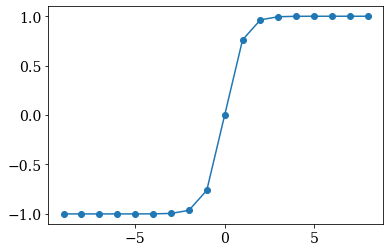

In [18]:
xnd = np.arange(-9,9,1)         # input vector  X = [-9, -8, -7, ..., +8]
Ynd = model(torch.Tensor(xnd))  # output vector Y = tanh(X),  elementwise
plt.plot (xnd, Ynd, '-o')

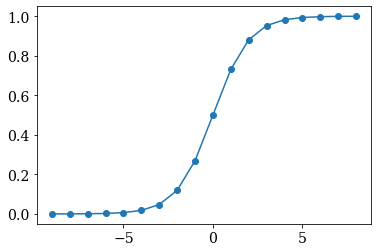

In [4]:
#==== PyTorch's Sigmoid function has a rather different shape, and goes from 0 to 1.
model = nn.Sigmoid()            
xnd = np.arange(-9,9,1) 
Ynd = model(torch.Tensor(xnd))
plt.plot (xnd, Ynd, '-o')

---
## 2. Linear layers

A linear layer takes an 
**input vector** 
$\underline{\mathbf{x}}$, multiplies it by a 
**weight matrix** 
$\underline{\underline{\mathbf{W}}}$, adds a 
**bias vector** 
$\underline{\mathbf{b}}$, and produces an 
**output vector** 
$\underline{\mathbf{Y}} = \underline{\underline{\mathbf{W}}}\cdot \underline{\mathbf{x}} + \underline{\mathbf{b}}$.  The components of the weight matrix and bias vector are **learnable parameters** that are adjusted during training. Visualize this as follows:

<img src="SKETCHES/linearlayer.png" alt="linearlayer.png" />
Linear layers are implemented in PyTorch as torch.nn.Linear(numInputs,numOutputs) and in Mathematica as LinearLayer[ ].

In [27]:
model = nn.Linear(1,1)                                     # layer function Y = f(x) = w*x + b
model.weight = torch.nn.Parameter(torch.Tensor( [[ 2 ]] )) # w = 2
model.bias   = torch.nn.Parameter(torch.Tensor(  [ 5 ] ))  # b = 5
xd = torch.Tensor([3])                                     # x = 3
model(xd).detach()                                         # y = 2*3+5 = 11

tensor([11.])

In [35]:
model = nn.Linear(3,2)                                               # layer function f(X) = W.X + B
model.weight = torch.nn.Parameter(torch.Tensor( [[1,1,1],[2,2,2]] )) # weight matrix W (MUST be a 2x3 matrix)
model.bias   = torch.nn.Parameter(torch.Tensor(  [0,0] ))            # bias vector B (MUST be a 2-vector)
xd = torch.Tensor([3,3,3])                                           # input vector X
model(xd).detach()                                                   # output Y = W.X + B

tensor([ 9., 18.])

In [36]:
#======== Verify that this is the same as matrix multiplication
W = np.array( [[1,1,1],[2,2,2]] )
B = np.array( [0,0] )
X = np.array( [3,3,3] )
W.dot(X) + B

array([ 9, 18])

In [37]:
W @ X + B

array([ 9, 18])

---
## 3. Loss functions

A **loss function** (or **criterion**) is a special type of layer that takes two inputs and produces one output.  

<img src="SKETCHES/losslayer.png" />
Ultimately, the loss should be a real-valued scalar.  Typically, a loss function is used to compare a **model prediction** with a **target** value that is known to be correct.  Typically, if the prediction equals the target, the loss is zero.  But if the prediction is far off from the target, the loss is large.  During network training, the model parameters are adjusted in order to minimize the loss.

PyTorch supplies various types of loss functions, including L1Loss, MSELoss, BCELoss, and CrossEntropyLoss, as demonstrated below.

### The L1 loss function
In PyTorch, the "L1Loss" function takes two tensors as input and computes $f(Y,y)=\lvert Y-y \rvert$ elementwise:

In [40]:
lossFunc = nn.L1Loss()
y = torch.Tensor( [ 42 ] )     # target output (actual training label fromdataset)
Y = torch.Tensor( [ 37 ] )     # model output (prediction)
lossFunc(Y,y)                  # epsilon = |Y-y|

tensor(5.)

tensor([5., 4., 3., 2., 1., 0., 1., 2., 3., 4.])


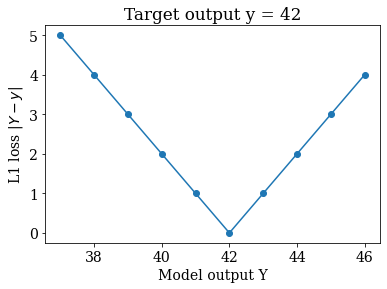

In [39]:
lossFunc = nn.L1Loss(reduction='none')                    # return the individual losses |Y_d - y_d|
h = 5
y = torch.Tensor(np.array([42   for d in range(-h,h)] ))  # target output (actual training label from dataset)
Y = torch.Tensor(np.array([42+d for d in range(-h,h)] ))  # model output (prediction)
e = lossFunc(Y,y)
print (e)
plt.plot (Y.flatten(), e.flatten(), '-o')
plt.title ('Target output y = 42')
plt.xlabel ('Model output Y')
plt.ylabel (r'L1 loss $|Y-y|$');

### The Mean Square Error (MSE) loss function

The MSE loss function computes $f(Y,y) = (Y-y)^2$:

tensor([25., 16.,  9.,  4.,  1.,  0.,  1.,  4.,  9., 16.])


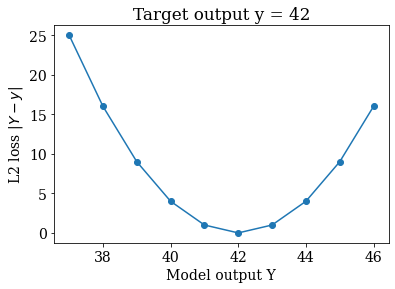

In [5]:
lossFunc = nn.MSELoss(reduction='none')                    # return the individual losses |Y_d - y_d|
h = 5
y = torch.Tensor(np.array([42   for d in range(-h,h)] ))  # target output (actual training label from dataset)
Y = torch.Tensor(np.array([42+d for d in range(-h,h)] ))  # model output (prediction)
e = lossFunc(Y,y)
print (e)
plt.plot (Y.flatten(), e.flatten(), '-o')
plt.title ('Target output y = 42')
plt.xlabel ('Model output Y')
plt.ylabel (r'L2 loss $|Y-y|$');

### The Binary Cross-Entropy (BCE) loss function

This loss function computes $f(Y,y) = -Y \ln y - (1-Y) \ln (1-y)$:

In [41]:
lossFunc = nn.BCELoss()
y = torch.Tensor( [ 1    ] ) # target output: '1'
Y = torch.Tensor( [ .99  ] ) # model output: 99% probability that output is '1'
print (lossFunc(Y,y))        # loss is very small

y = torch.Tensor( [ 1  ] )   # target output: '1'
Y = torch.Tensor( [ .01 ] )  # model output: 1% probability that output is '1'
print (lossFunc(Y,y))        # loss is very large; model is being punished for being wrong

y = torch.Tensor( [ 0   ] )  # target output: '0'
Y = torch.Tensor( [ .99 ] )  # model output: 99% probability that output is '1'
print (lossFunc(Y,y))        # loss is very large; model is being punished for being wrong

tensor(0.0101)
tensor(4.6052)
tensor(4.6052)


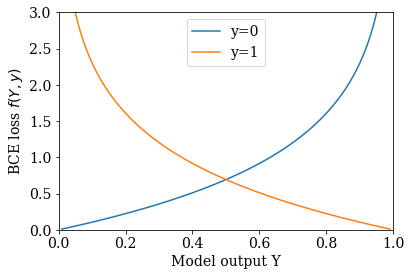

In [44]:
lossFunc = nn.BCELoss(reduction='none')               # return the individual losses, bce(y_i, Y_i)
Y = torch.Tensor(np.array([d   for d in np.arange(.01,.995,.01)] ))  # model output (prediction)
y = torch.Tensor(np.array([0   for d in np.arange(.01,.995,.01)] ))  # target output (actual training label from dataset)
e = lossFunc(Y,y)
plt.plot (Y.flatten(), e.flatten(), '-', label='y=0')
y = torch.Tensor(np.array([1   for d in np.arange(.01,.995,.01)] ))  # target output (actual training label from dataset)
e = lossFunc(Y,y)
plt.plot (Y.flatten(), e.flatten(), '-', label='y=1')
plt.legend ()
plt.xlabel ('Model output Y'); plt.xlim ([0,1]); plt.ylim ([0,3]);
plt.ylabel (r'BCE loss $f(Y,y)$');

Above, we see that if the target output is y=1, then the BCE loss is 0 if Y=1 (model has 100% confidence about correct answer) and goes to infinity if Y=0 (model always predicts wrong answer).

### The Cross-Entropy Loss function

- This loss function is used for general classification problems.  It is more difficult to explain.  
- Below, lossFunc(Y,y) takes two tensors as input.
- The first tensor, Y, is an array of *logits* that represent the "confidence" of the model about the input belonging to each class.
  For example, in the first example below, the zeroth element of Y is -1, indicating that the model thinks that the input is unlikely to be in class 0,
  whereas the third element of Y is +9, indicating that the input is most likely to be in class 3.
- The second tensor, y, is the target output (the actual class index).


In [24]:
lossFunc = nn.CrossEntropyLoss()
Y = torch.Tensor( [[ -1., 0., 1., 9., 2. ]] )  # model predicts class=3 with high confidence
y = torch.tensor( [ 3 ], dtype=torch.long)     # actual class is class=3
print (lossFunc(Y,y))                          # loss is very small

Y = torch.Tensor( [[ -1., 0., 1., 9., 2. ]] )  # model predicts class=3 with high confidence
y = torch.tensor( [ 4 ], dtype=torch.long)     # actual class is class=4
print (lossFunc(Y,y))                          # loss is very large (i.e., model is bad)

tensor(0.0014)
tensor(7.0014)


---
## 4. Sequences of layers

A real neural network usually contains multiple layers, connected in some fashion.  A **feedforward neural network** is one that can be represented by a directed graph, with each layer represented by an edge pointing from input to output, such that there are no cycles.  The simplest network architecture is a sequential one, where the output of one layer is fed in as in the input to the next layer.  For example, the network below implements the function $Y=\tanh(wx+b)$.  First it computes $u=wx+b$, then $Y=\tanh(u)$:

<img src="SKETCHES/sequentiallayers.png" />

This is accomplished using torch.nn.Sequential. (The Mathematica equivalent is NetChain[].)

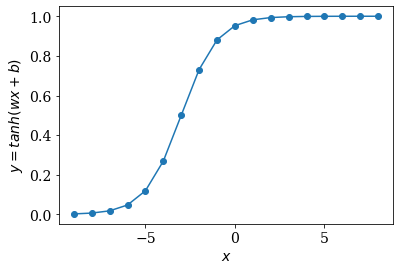

In [54]:
model = nn.Sequential(
          nn.Linear(1,1),   # w and b are initialized randomly
          nn.Sigmoid()      # this performs a fixed function with NO adjustable parameters
        )
model[0].weight = torch.nn.Parameter(torch.Tensor( [[1]] )) # weight matrix W
model[0].bias   = torch.nn.Parameter(torch.Tensor(  [3] )) # bias vector B
xnd = torch.Tensor( [[x] for x in np.arange(-9,9,1)] )
Ynd = model(xnd)
plt.plot (xnd, Ynd.detach().numpy(), '-o')
plt.xlabel (r'$x$')
plt.ylabel (r'$y=tanh(wx+b)$');

Moreover, one typically takes the classifier output and the training output and feeds them into a loss function to get the loss:

<img src="SKETCHES/sequentiallayers2.png" />

In the example below, the black symbols are training data, and the blue crosses are model predictions.  
When the model matches the data, the loss is small.  
Near the middle of the graph, the model is uncertain about its prediction, and the loss is about 0.69.  
Moreover, there are some points where the model is confident about predicting a '0', but the true data is '1', and this causes the largest loss.

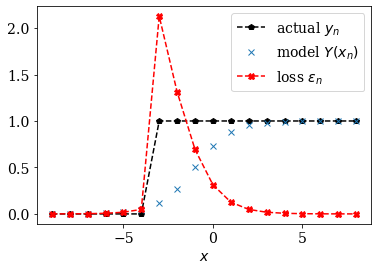

In [15]:
ynd = torch.round (torch.sigmoid(xnd + 3.5))
lossFunc = nn.BCELoss(reduction='none')
en = lossFunc (Ynd, ynd)
plt.plot (xnd, ynd.detach().numpy(), '--kp', label='actual $y_n$')
plt.plot (xnd, Ynd.detach().numpy(), 'x', label='model $Y(x_n)$')
plt.plot (xnd, en.detach().numpy(),  '--rX', label='loss $\epsilon_n$')
plt.xlabel ('$x$')
plt.legend ()

---
## 5.  Pooling layers
A pooling layer takes an input matrix and produces a smaller output matrix.  It produces a coarse-grained version of an image by combining several pixel values.  For example, nn.AvgPool2d(kernel_size=2) divides the original image into 2x2 blocks and averages over each blocks, as demonstrated below.


INPUT PIXELS = 
 [[1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0.]]

OUTPUT PIXELS = 
 tensor([[1.0000, 0.0000, 0.0000, 1.0000],
        [0.7500, 0.7500, 0.7500, 0.7500],
        [0.0000, 0.7500, 0.7500, 0.0000],
        [0.0000, 0.5000, 0.5000, 0.0000]])


Text(0.5, 1.0, 'output')

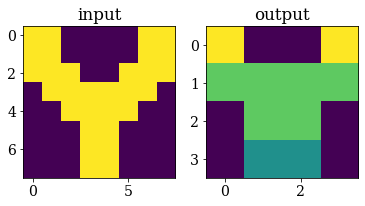

In [56]:
model = nn.AvgPool2d(kernel_size=2)
xij = np.array ([      # xij[i,j] is the pixel value at row i and column j of the image
  [1,1,0,0,0,0,1,1],   # xij[2,3] is the pixel value at row 2 and column 3
  [1,1,0,0,0,0,1,1],
  [1,1,1,0,0,1,1,1],
  [0,1,1,1,1,1,1,0],
  [0,0,1,1,1,1,0,0],
  [0,0,0,1,1,0,0,0],
  [0,0,0,1,1,0,0,0],
  [0,0,0,1,1,0,0,0],
],dtype=float)
xnij = torch.tensor(xij,dtype=torch.float32).reshape(1,8,8) # need to make a LIST of input images: n=0,1,2,3,... label the different images
Ynij = model(xnij).detach()          # feed 1  8x8 image into the model, get 1  4x4 image as output
Yij = Ynij[0]                        # just take that image and save it as a single 4x4 array
print ('\nINPUT PIXELS = \n',xij)
print ('\nOUTPUT PIXELS = \n',Yij)
plt.subplots(1, 2, figsize=(6,3))
plt.subplot(1,2, 1); plt.imshow(xij) ; plt.title ('input')
plt.subplot(1,2, 2); plt.imshow(Yij) ; plt.title ('output')

In the above example, an 8x8 image is downsampled to 4x4 using a pooling layer.

---
## 6.  Convolutional layers

### 6.1. Definition

In the context of machine learning, the term "convolution" is often used to mean "correlation".  The correlation of an input vector $x_i$ and a kernel $z_k$ is

$\qquad\begin{align}
y_j = \sum_{i} x_i z_{i-j} \quad (i,j,k\in \mathbb{Z}).
\end{align}$

Here $x_i$, $z_k$, and $y_j$ are vectors with an infinite number of elements but finite support.  In other words, the elements

$\qquad\begin{align}
x_i &\quad (i=0,1,2,\dots,I-1) \\
z_k &\quad (i=0,1,2,\dots,K-1) \\
y_j &\quad (j=-K+1,\dots,I+K-1) 
\end{align}$

may be nonzero, but all other elements are zero.  Moreover, a typical correlation routine includes options for left padding $L$ and right padding $R$, where $\{L,R\} \subseteq \{0,1,2,\dots,K-1\}$.  The output vector from such a routine is

$\qquad\begin{align}
\{y_j\} &\quad (j=-L,\dots,I-K-1+R).
\end{align}$


The example below illustrates a convolution between an input vector of size $I=6$ and a kernel of size $K=3$.

                 -2 -1  0  1  2  3  4  5          index (i or k)
    ============================================
    x_i                 1  1  0  0  0  1          inputs x_i
    z_k                 1  1  1                   kernel z_k
    ============================================  shifted kernels z_{i-j}
    j=-2          1  1  1                         z_{i+2}
    j=-1             1  1  1                      z_{i+1}
    j=0                 1  1  1                   z_{i+0}
    j=1                    1  1  1
    j=2                       1  1  1
    j=3                          1  1  1
    j=4                             1  1  1
    j=5                                1  1  1    z_{i-5}
    ============================================
    y_j           1  2  2  1  0  1  1  1          L=2, R=2
                  1  2  2  1  0  1                L=2, R=0       
                        2  1  0  1                L=0, R=0
                        2  1  0  1  1  1          L=0, R=2

More generally, the correlation between two tensors is defined as

$\qquad\begin{align}
y_\mathbf{j} = \sum_{\mathbf{i}} x_\mathbf{i} z_{\mathbf{i}-\mathbf{j}}
\end{align}$

where the indices $\mathbf{i}$, $\mathbf{j}$, and $\mathbf{k}$ are integer vectors representing points on a 1D, 2D, or 3D grid.  It is often useful to calculate correlations between 1D audio signals, 1D time series, 2D raster images, or 3D datasets.

In neural network theory, a convolutional layer is a layer that calculates a 1D, 2D, or 3D convolution (or correlation).  A convolutional neural network (CNN) is a neural network that contains one or more convolutional layers.


(For details, see Mathematica's ListConvolve[ ] and ListCorrelate[ ].)

---
### 6.2. Why use convolutional layers?

The functions below compute convolutions (actually correlations) from first principles:

In [67]:
'''
convolve1d(input, kernel, padleft=0, padright=0)
'''
def convolve1d (xi, zk, L=0, R=0):
  I = len(xi)       # input size
  K = len(zk)       # kernel size
  if L==-1: L=K-1
  if R==-1: R=K-1
  J = L + I-K+1 + R
  yj = np.zeros (J)
  for i in range(I):
    for k in range(K):
      j = i-k
      if j >= -L and j < I-K+1 + R:
        yj[L+j] += xi[i] * zk[k]
  return yj

In [68]:
'''
convolve2d(input, kernel, padleft=0, padright=0)
'''
from collections.abc import Iterable
def convolve2d (xi, zk, L=0, R=0):
  xi = np.array (xi) # should check if xi are list
  zk = np.array (zk)
  I = np.array( xi.shape )
  K = np.array( zk.shape )
  if not isinstance(L, Iterable): L = np.full_like(I, L)
  if not isinstance(R, Iterable): R = np.full_like(I, R)
  L = np.where (L==-1, K-1, L)
  R = np.where (R==-1, K-1, R)
  J = L + I-K+1 + R
  #print ("Input size:\tI={}\nKernel size:\tK={}\nLeft padding:\tL={}\nRight padding:\tR={}\nOutput size:\tJ={}".format (I,K,L,R,J))
  yj = np.zeros (J)
  for i0 in range(I[0]):
    for i1 in range(I[1]):
      for k0 in range(K[0]):
        for k1 in range(K[1]):
          j0 = L[0] + i0 - k0
          j1 = L[1] + i1 - k1
          if j0 >= 0 and j0 < J[0] and j1 >=0 and j1 < J[1]:
            yj[j0,j1] += xi[i0,i1] * zk[k0,k1]
  return yj

In [69]:
#======== DEMONSTRATE EFFECT OF PADDING
print ( convolve1d ([1,1,0,0,0,1], [1,1,1])              )
print ( convolve1d ([1,1,0,0,0,1], [1,1,1], L=-1)        )
print ( convolve1d ([1,1,0,0,0,1], [1,1,1], R=-1)        )
print ( convolve1d ([1,1,0,0,0,1], [1,1,1], L=-1, R=-1)  )

[2. 1. 0. 1.]
[1. 2. 2. 1. 0. 1.]
[2. 1. 0. 1. 1. 1.]
[1. 2. 2. 1. 0. 1. 1. 1.]


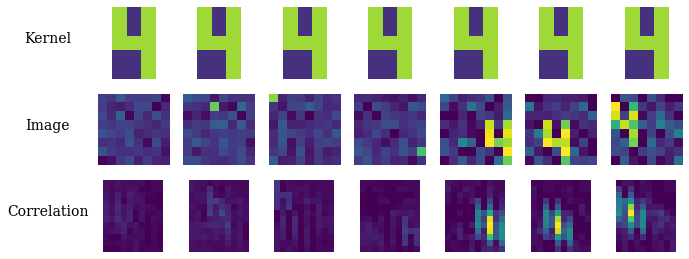

In [70]:
kernel = np.array ([
  [1,0,1],
  [1,0,1],
  [1,1,1],
  [0,0,1],
  [0,0,1],
],dtype=float)

def makeColumn():
  plt.subplot(3,cols, col+0*cols); plt.imshow(kernel, vmin=-0.2, vmax=1.2); plt.axis ('off')
  plt.subplot(3,cols, col+1*cols); plt.imshow(inputs, vmin=-0.2, vmax=1.2); plt.axis ('off')
  plt.subplot(3,cols, col+2*cols); plt.imshow(outputs, vmin=-0.2, vmax=7.2); plt.axis ('off')
  
cols = 8; col = 1; panelSize=1.5
plt.subplots(3,cols, figsize=(cols*panelSize,3*panelSize))
plt.subplot(3,cols, 1+0*cols); plt.axis ('off'); plt.text (.5,.5,'Kernel',ha='center')
plt.subplot(3,cols, 1+1*cols); plt.axis ('off'); plt.text (.5,.5,'Image',ha='center')
plt.subplot(3,cols, 1+2*cols); plt.axis ('off'); plt.text (.5,.5,'Correlation',ha='center')
for col in [2]:
  inputs = 0.1*rng.standard_normal ([8,8])  # noise
  outputs = convolve2d (inputs, kernel, -1, -1)
  makeColumn()
for col in [3,4,5]:
  inputs = 0.1*rng.standard_normal ([8,8])
  i0,j0 = rng.integers (0, [8,8], [2])
  inputs[i0,j0] += 1           # stamp
  outputs = convolve2d (inputs, kernel, -1, -1)
  makeColumn()
for col in [6,7,8]:
  inputs = 0.2*rng.standard_normal ([8,8])  # noise
  i0,j0 = rng.integers (0, [4,6], [2])      # shift
  inputs[i0:i0+kernel.shape[0], j0:j0+kernel.shape[1]] += kernel           # stamp
  outputs = convolve2d (inputs, kernel, -1, -1)
  makeColumn()

In the example above, we define a kernel that looks like the numeral "4", and see what happens when we convolve it with various images.  Let's examine these from left to right.
- The first image is random noise.  The correlation also looks like random noise.
- Images 2, 3, and 4 have one bright pixel in a random location.  The correlation contains a pattern in the shape of the letter "h".
- Images 5, 6, and 7 contain the numeral "4" shifted to a random location.  The correlation contains a bright spot indicating at location.

If we train a convolutional neural network by showing it lots of images that contain the numeral "4", we expect that the pattern "4" will eventually become "imprinted in the memory" of the network.  In other words, the weight matrix will begin to look like a "4".  Due to the translation-invariant nature of convolutions, the network will then be able to recognize the numeral "4" *even when it occurs at a different location from its position in any of the training images*!  This is why CNNs are so powerful and are able to generalize.

---
### 6.3. Convolutional layers in PyTorch

The simplest type of convolutional layer implements a convolution as defined above.  For example, one may have a situation where:
- The input is an 8x8 array (grayscale image)
- The weight matrix is a 5x3 array (representing the kernel)
- The output is a 12x10 array.
In addition, convolutional layers usually include a bias for each pixel.  In this case:
- The bias is a 12x10 array.

PyTorch provides a class called nn.Conv2d that is powerful but also difficult to understand, because its inputs and outputs are 4th-rank tensors. 

To help you understand this, consider the CIFAR-10 dataset, which contains 60000 32x32 RGB images.  Suppose we load the entire dataset into memory as an array.  To help ourselves remember the structure of this array, let's call it *xncij*.  Now we may access an element of the array by writing *xncij[n,c,i,j]*, where:
- The zeroth index ($n=0,1,2,\dots,59999$) distinguishes between data instances (training or testing example images).  
- The first index ($c=0,1,2$) is the channel index (red, green, or blue).
- The second index ($i=0,1,2,\dots,31$) labels rows of the image.
- The third index ($j=0,1,2,\dots,31$) labels columns of the image.

For example, *xncij[54321, 1, 11, 22]* is the value of the GREEN component of the pixel in image 54321 at row 11 and column 22.

Now, imagine feeding the dataset into a convolutional layer.  Each RGB image can be visualized as a stack of three grayscale images, as shown in the sketch below.  The output can be visualized as another stack of grayscale images, as sketched below:

<img src="SKETCHES/convlayer.png" />

In the above example, if there had been only one input channel and one output channel, then w would be a 5x5 matrix.  But there are 3 input channels and 7 output channels, so w is a 3x7x5x5 tensor.  To remind ourselves about the shapes of the arrays, we may use the following naming scheme:

    xncij[n,c,i,j]       inputs
    yncij[n,c,i,j]       outputs
    bc[c]                biases
    wccij[cOut,cIn,i,j]  weights

Below, we demonstrate Conv2d:

/tmp/ipykernel_26925/2958929388.py:28: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1666642975993/work/torch/csrc/utils/tensor_new.cpp:230.)
  model.weight = nn.Parameter(torch.tensor( [[kernel]] ))


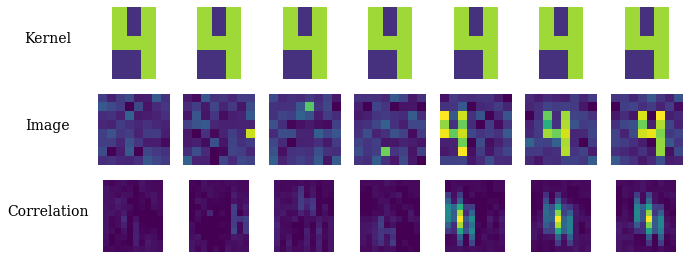

In [71]:
kernel = np.array ([
  [1,0,1],
  [1,0,1],
  [1,1,1],
  [0,0,1],
  [0,0,1],
],dtype=float)

xnij = []
for iter in range(1):
  xij = 0.1*rng.standard_normal ([8,8])      # noise
  xnij += [xij]
for iter in range(3):
  xij = 0.1*rng.standard_normal ([8,8])      # noise
  xij[rng.integers(8),rng.integers(8)] += 1  # dot
  xnij += [xij]
for iter in range(3):
  xij = 0.1*rng.standard_normal ([8,8])      # noise
  i0,j0 = rng.integers (0, [4,6], [2])       # shift
  xij[i0:i0+kernel.shape[0], j0:j0+kernel.shape[1]] += kernel  # stamp
  xnij += [xij]
  
xnij = np.array(xnij)
nmax,imax,jmax = xnij.shape

model = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(5,3), padding=(4,2))
model.bias   = nn.Parameter(torch.tensor( [0.] , dtype=float ))
model.weight = nn.Parameter(torch.tensor( [[kernel]] ))

xncij = torch.tensor( xnij.reshape(nmax, 1, imax, jmax))

Yncij = model(xncij).detach().numpy()
Ynij = Yncij.squeeze()                     # get rid of the channel dimension

cols = nmax+1 ; rows = 3
plt.subplots(rows,cols, figsize=(cols*panelSize,3*panelSize))
plt.subplot(rows,cols, 1+0*cols); plt.axis ('off'); plt.text (.5,.5,'Kernel',ha='center')
plt.subplot(rows,cols, 1+1*cols); plt.axis ('off'); plt.text (.5,.5,'Image',ha='center')
plt.subplot(rows,cols, 1+2*cols); plt.axis ('off'); plt.text (.5,.5,'Correlation',ha='center')
for n in range(nmax):
  plt.subplot(rows,cols, 1+0*cols+1+n); plt.imshow(kernel, vmin=-0.2, vmax=1.2); plt.axis ('off')
  plt.subplot(rows,cols, 1+1*cols+1+n); plt.imshow(xnij[n], vmin=-0.2, vmax=1.2); plt.axis ('off')
  plt.subplot(rows,cols, 1+2*cols+1+n); plt.imshow(Ynij[n], vmin=-0.2, vmax=7.2); plt.axis ('off')